### HCVA Experiment Analysis (Wandb Data)
The following notebook is used for analysis of experiment runs that were completed using hpc and monitored using wandb

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the style of the plots
plt.style.use("ggplot")
colours = ['red', 'green', 'blue', 'orange']


# Loading in the data:
# Directory containing the data files
data_dir = '/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/wandb_run_data'

# Initialize an empty list to store dataframes
dfs = []

# Loop through each file in the directory
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        file_path = os.path.join(data_dir, file)
        df = pd.read_csv(file_path)
        dfs.append(df)
all_data = pd.concat(dfs, ignore_index=True)

strategies = ['h.', '1.', '10.', 't.']
results_by_strategy = []

for strategy in strategies:
    results_by_strategy.append(all_data.filter(like='experiment_score_' + strategy))
results_by_strategy = [df.rename(columns=lambda x: x.replace('experiment_score_'+strategy, '')) for df, strategy in zip(results_by_strategy,strategies)]
for i in range(len(results_by_strategy)):
    results_by_strategy[i] = results_by_strategy[i].reindex(sorted(results_by_strategy[i].columns, key=lambda x: float(x)), axis=1)

### Plotting cumulative divergence by strategy

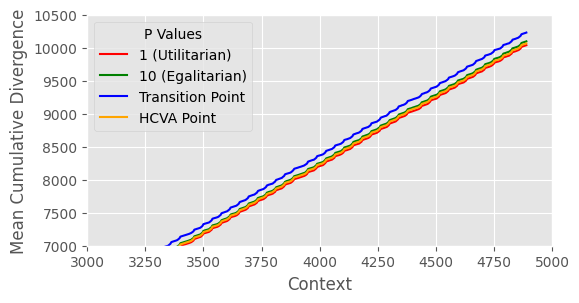

In [136]:
plt.figure(figsize=(6, 3))
labels = ['1 (Utilitarian)', '10 (Egalitarian)', 'Transition Point', 'HCVA Point']
for i, df in enumerate(results_by_strategy):
    cumulative_sum = df.sum(axis=1).cumsum()
    plt.plot(cumulative_sum, label=labels[i], color=colours[i])
# Add labels and title
plt.xlabel('Context')
plt.ylabel('Mean Cumulative Divergence')
#plt.title(f'Worst case Cumulative Divergence for Different P Values\n {name} society')
plt.legend(title='P Values')
plt.ylim(7000, 10500)  # Set the y-axis limits
plt.xlim(3000,5000)
plt.grid(True)    

### Comparisons between Transition Point and HCVA

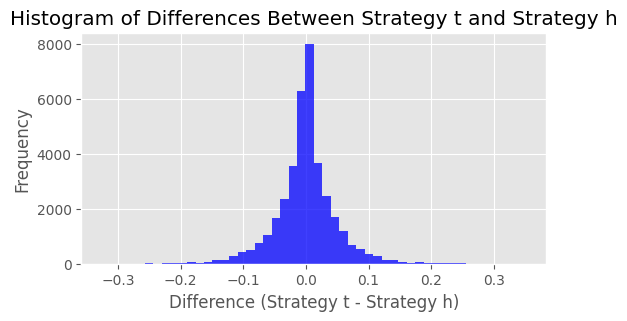

In [137]:
# Calculate the difference between strategy t and strategy h
difference = results_by_strategy[0] - results_by_strategy[3]

# Plot the difference as a histogram
plt.figure(figsize=(6, 3))
plt.hist(difference.values.flatten(), bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Differences Between Strategy t and Strategy h')
plt.xlabel('Difference (Strategy t - Strategy h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Divergence Differences

In [138]:
# Finding cumulative divergence for each strategy
cumulative_divergence = []

for strategy in results_by_strategy:
    divergence_for_agent = []
    for column in strategy.columns:
        divergence_for_agent.append(strategy[column].sum())
    cumulative_divergence.append(divergence_for_agent)

# Find the agents with the highest divergence for each strategy
highest_divergence_agents = [np.argmax(divergence) for divergence in cumulative_divergence]

# Print the agents with the highest divergence for each strategy
#for i, agent in enumerate(highest_divergence_agents):
#    print(f"Strategy {strategies[i]}: Agent with highest divergence is {agent}")

# Calculate and print the average divergence for each strategy
average_divergence = [np.mean(divergence) for divergence in cumulative_divergence]
for i, avg_div in enumerate(average_divergence):
    print(f"Strategy {strategies[i]}: Average divergence is {avg_div}")

# Calculate the 99th percentile over all cumulative divergences combined
all_divergences = np.concatenate(cumulative_divergence)
percentile_99 = np.percentile(all_divergences, 98)

# Finding the 99th percentile of agents
for i, divergence in enumerate(cumulative_divergence):
    agents_outside_99th_percentile = [agent for agent in range(len(divergence)) if divergence[agent] > percentile_99]
    print(f"Strategy {strategies[i]}: Agents outside the 99th percentile: {len(agents_outside_99th_percentile)}")

Strategy h.: Average divergence is 100.38198301079575
Strategy 1.: Average divergence is 100.9647568717062
Strategy 10.: Average divergence is 102.29549712363742
Strategy t.: Average divergence is 100.65304840490761
Strategy h.: Agents outside the 99th percentile: 2
Strategy 1.: Agents outside the 99th percentile: 2
Strategy 10.: Agents outside the 99th percentile: 2
Strategy t.: Agents outside the 99th percentile: 2


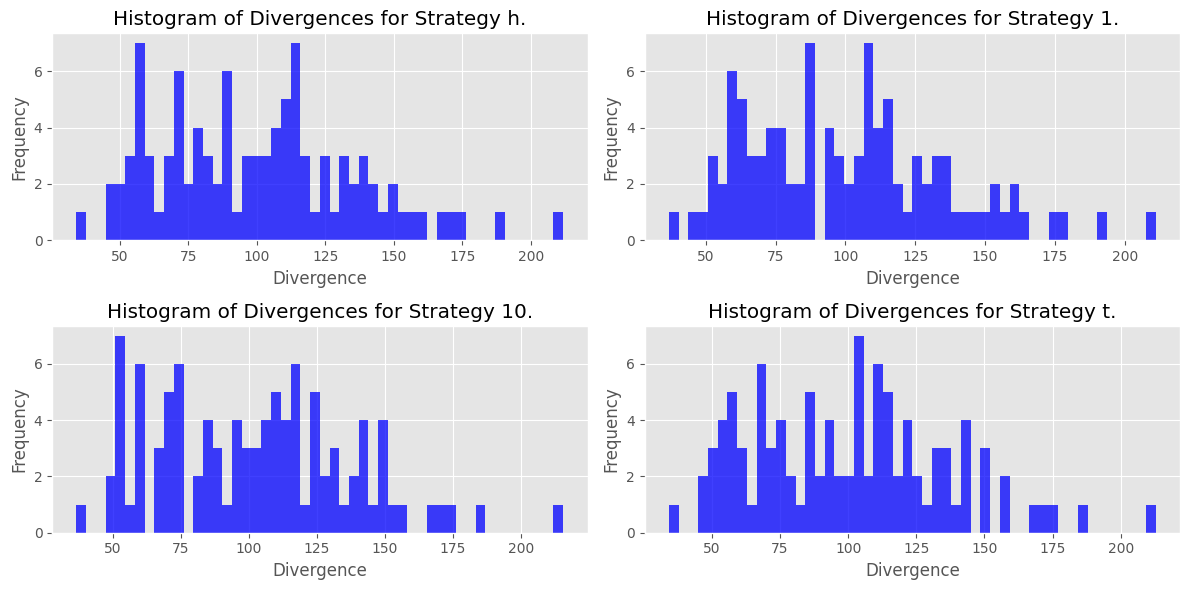

In [139]:
# Plot histograms of all divergences for each strategy
plt.figure(figsize=(12, 6))

for i, strategy_divergence in enumerate(cumulative_divergence):
    plt.subplot(2, 2, i+1)
    plt.hist(strategy_divergence, bins=50, alpha=0.75, color='blue')
    plt.title(f'Histogram of Divergences for Strategy {strategies[i]}')
    plt.xlabel('Divergence')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

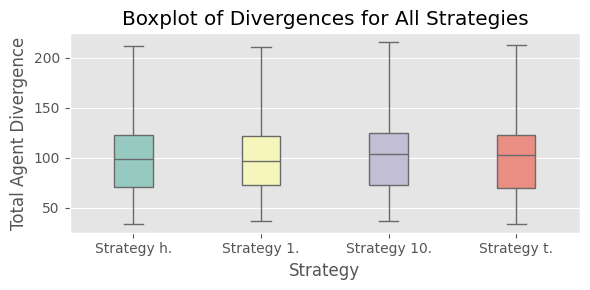

In [140]:
plt.figure(figsize=(6, 3))

# Combine all divergences into a single DataFrame for plotting
combined_divergence = pd.DataFrame({
    'Strategy h.': cumulative_divergence[0],
    'Strategy 1.': cumulative_divergence[1],
    'Strategy 10.': cumulative_divergence[2],
    'Strategy t.': cumulative_divergence[3]
})

sns.boxplot(data=combined_divergence, width=0.3, whis=3, palette="Set3")
plt.title('Boxplot of Divergences for All Strategies')
plt.xlabel('Strategy')
plt.ylabel('Total Agent Divergence')
#plt.ylim(0, 20)  # Set the y-axis limits

plt.tight_layout()
plt.show()